<a href="https://colab.research.google.com/github/musab-hack/Machine-Learning-/blob/master/MNIST_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning with MNIST datasets, Complete Tutorial with Explanation



## Some Important Points to Note down!!!!


**1)** You can either define a utility function (or fitness function) that measures how good your model is, or you can define a **cost function** that measures how bad it is.

**2)** For **linear regression problems**, people
typically use a cost function that measures the distance between the linear model’s predictions and the training examples; the objective is to minimize this distance.

URL : https://ibb.co/qrC71qK     (Image)

**3)** During Clearning of data some instances are clearly outliers, it may help to simply discard them

**4)** ***Overfitting the Training Data***: In Machine Learning this is called overfitting: it means that the model performs well on the training data, but it does not generalize well.

**5)** Regularization reduces the risk of overfitting of datasets and it can be controlled by the hyperparameter

**6)** Important concept about **Non-Linear Regression** and **Linear Regression**
https://www.javatpoint.com/machine-learning-polynomial-regression#:~:text=ML%20Polynomial%20Regression&text=It%20is%20also%20called%20the,order%20to%20increase%20the%20accuracy.

**7)** Be aware about the Nonlinear Datasets and Linear Datasets

**8)** For the best choice of the model you can use the Cross Validation 

In [20]:
import numpy as np
import pandas as pd


In [21]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784' , version=1)

In [63]:
data , target = mnist["data"] , mnist["target"]
data[1] # Single Pixel

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [9]:
data.shape # Print the rows and columns of the data

(70000, 784)

There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black)

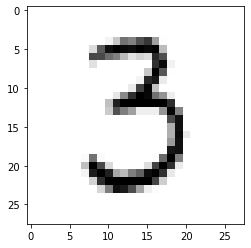

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

digit = data[50]
digit = digit.reshape(28 , 28)

plt.imshow(digit , cmap = mpl.cm.binary , interpolation="nearest")
plt.show()

Note that the label is a string, we need to convert into int 


In [22]:
target = target.astype(np.uint8)
target

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

You should always create a test set and set it aside before inspecting the data
closely. The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images):


In [67]:
def train_test_split(data , split_num):
  shuffled_indices = np.random.permutation(len(data))
  test_num = int(len(shuffled_indices)*split_num)
  test_data_indices = shuffled_indices[:test_num]
  train_data_indices = shuffled_indices[test_num:]
  return data[test_data_indices] , data[train_data_indices]

In [74]:
# Convert numpy array to pandas
# data = pd.DataFrame(data = data) but it will takw too much space

test_data , train_data = train_test_split(data , 0.12)

In [75]:
print("Shape Of Test Data" , test_data.shape)
print("Shape of train Data" , train_data.shape)

Shape Of Test Data (8400, 784)
Shape of train Data (61600, 784)


# **Training The Binary Classifier**